<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>

# The Thematic map

Last session we opened this map:

In [1]:
import geopandas as gpd

linkGitSession='https://github.com/CienciaDeDatosEspacial/dataSets/raw/main/'
linkCountries='WORLD/World_Countries.zip'

fullLinkCountries=linkGitSession+linkCountries
countries=gpd.read_file(fullLinkCountries)
countries

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
...,...,...
247,South Sudan,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34..."
248,Indonesia,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832..."
249,East Timor,"MULTIPOLYGON (((124.41824 -9.3001, 124.40446 -..."
250,Curacao (Netherlands),"POLYGON ((-68.96556 12.19889, -68.91196 12.181..."


As you see, the GDF above has just two colums; enough to plot a map, but no more than that.

Let me open a DF:

In [2]:
import pandas as pd

someDataLink='WORLD/some_dataworld.csv'

someData=pd.read_csv(linkGitSession+someDataLink)

someData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       171 non-null    object 
 1   iso2          170 non-null    object 
 2   iso3          171 non-null    object 
 3   region        171 non-null    object 
 4   fragility     171 non-null    float64
 5   co2           171 non-null    int64  
 6   sq_km         171 non-null    int64  
 7   num_airports  171 non-null    int64  
 8   population    171 non-null    int64  
 9   mobiles       171 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 13.5+ KB


The DF has some interesting numerical data (_float64_):
* fragility: fragility index 2023 -[details here](https://fragilestatesindex.org/2023/06/14/fragile-states-index-2023-annual-report/)
* co2: metric tonnes of CO2 emmitted -[details here](https://www.cia.gov/the-world-factbook/field/carbon-dioxide-emissions/country-comparison/)
* sq_km: country area -[details here](https://www.cia.gov/the-world-factbook/field/area/country-comparison/)
* num_airports: count of airports in the country -[details here](https://www.cia.gov/the-world-factbook/field/airports/country-comparison/)
* population: country population  -[details here](https://www.cia.gov/the-world-factbook/field/population/country-comparison/)
* mobiles: total number of mobile cellular telephone subscribers -[details here](https://www.cia.gov/the-world-factbook/field/telephones-mobile-cellular/country-comparison/)

There are also other columns that may be of help:

In [3]:
someData.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
1,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000
4,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000


Preparing thematic maps requires social data about the geometry (line, polygon, point). The object **countries** has no social data, so the preprocessing requires geomerging.

## Geo Merging

This is a critical preprocessing operation, as it is in charge of combining data sets, in this case combine a DF into a GDF. Some rules are needed:

* There is at least one common column needed to serve for the matches.
* The common columns, or KEYs, need contents to be written exactly in both columns.
* It is recommended that both KEYs are named the same.

Here we have the KEYs:

In [4]:
countries.COUNTRY.head()

,COUNTRY
0,Aruba (Netherlands)
1,Antigua and Barbuda
2,Afghanistan
3,Algeria
4,Azerbaijan


In [5]:
someData.Country.head()

,Country
0,AFGHANISTAN
1,ALBANIA
2,ALGERIA
3,ANGOLA
4,ANTIGUA AND BARBUDA


Let's solve the name differences for the KEYs:

In [6]:
countries.rename(columns={'COUNTRY':'Country'},inplace=True)

We can notice the different *case* in the KEYs. Let's work with uppercases:

In [7]:
countries['Country']=countries.Country.str.upper()

It is very unlikely the names are written the same. Let's verify:

In [8]:
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

Check here:

In [10]:
onlyDF # they did not find a match in the MAP GDF!

{'BAHAMAS (THE)',
 'BOLIVIA (PLURINATIONAL STATE OF)',
 'BRUNEI DARUSSALAM',
 'CABO VERDE',
 'CENTRAL AFRICAN REPUBLIC (THE)',
 'COMOROS (THE)',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
 'CONGO (THE)',
 "CÔTE D'IVOIRE",
 'DOMINICAN REPUBLIC (THE)',
 'ESWATINI',
 'GAMBIA (THE)',
 'IRAN (ISLAMIC REPUBLIC OF)',
 'KOREA (THE REPUBLIC OF)',
 "LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
 'MICRONESIA (FEDERATED STATES OF)',
 'MOLDOVA (THE REPUBLIC OF)',
 'NETHERLANDS (THE)',
 'NIGER (THE)',
 'NORTH MACEDONIA',
 'NORTHERN MARIANA ISLANDS (THE)',
 'PHILIPPINES (THE)',
 'RUSSIAN FEDERATION (THE)',
 'SAMOA',
 'SUDAN (THE)',
 'TANZANIA, THE UNITED REPUBLIC OF',
 'TIMOR-LESTE',
 'UNITED ARAB EMIRATES (THE)',
 'UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN IRELAND (THE)',
 'UNITED STATES OF AMERICA (THE)'}

There are several countries in the DF that did not find a match in the GDF (map). Of course, most of them are in the map, let's see why they were not matched.

### Fuzzy merging

We use this technique to detect similarities between strings. You need this package **thefuzz**:

In [11]:
# !pip install thefuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.7 MB/s eta 0:00:00


This is the basic idea:

In [12]:
from thefuzz.process import extractOne as best

## find the BEST match to 'BAHAMAS (THE)'
## from all strings in 'onlyGDF'

best('BAHAMAS (THE)',onlyGDF)

('BAHAMAS', 90)

As you see, you get 90% match between those strings. That may be a reliable result.

Let's do the same for all the unmatched countries:

In [13]:
## for each country in onlyDF, find the BEST match in onlyGDF

[(country, best(country,onlyGDF)) for country in onlyDF]

[('BAHAMAS (THE)', ('BAHAMAS', 90)),
 ('TIMOR-LESTE', ('EAST TIMOR', 81)),
 ('COMOROS (THE)', ('COMOROS', 90)),
 ('RUSSIAN FEDERATION (THE)', ('RUSSIA', 90)),
 ('KOREA (THE REPUBLIC OF)',
  ('SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK)', 86)),
 ('SAMOA', ('WESTERN SAMOA', 90)),
 ('CABO VERDE', ('CAPE VERDE', 80)),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  ('DEMOCRATIC REPUBLIC OF THE CONGO', 95)),
 ("CÔTE D'IVOIRE", ('IVORY COAST', 58)),
 ('ESWATINI', ('LIECHTENSTEIN', 60)),
 ('NETHERLANDS (THE)', ('NETHERLANDS', 95)),
 ('BOLIVIA (PLURINATIONAL STATE OF)', ('BOLIVIA', 90)),
 ('BRUNEI DARUSSALAM', ('BRUNEI', 90)),
 ('MICRONESIA (FEDERATED STATES OF)', ('FEDERATED STATES OF MICRONESIA', 95)),
 ('CENTRAL AFRICAN REPUBLIC (THE)', ('CENTRAL AFRICAN REPUBLIC', 95)),
 ('SUDAN (THE)', ('SUDAN', 90)),
 ('NIGER (THE)', ('NIGER', 90)),
 ('TANZANIA, THE UNITED REPUBLIC OF', ('TANZANIA', 90)),
 ('UNITED ARAB EMIRATES (THE)', ('UNITED ARAB EMIRATES', 95)),
 ('PHILIPPINES (THE)', ('PHILIPPINES',

Each element in the *list* above in in parentheses, for instance:

```
('TIMOR-LESTE', ('EAST TIMOR', 81))
```

That element has two elements:


*   **'TIMOR-LESTE'** from *onlyDF*, and
*   **('EAST TIMOR', 81)** which is the result from _best(country,onlyGDF)_. This last element, as we just saw above, shows the best match and the level of similarity (the higher the more similar).

We can prepare a list where each element has three elements:



In [ ]:
#or
[(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]

[('GAMBIA (THE)', 'GAMBIA', 90),
 ('DOMINICAN REPUBLIC (THE)', 'DOMINICAN REPUBLIC', 95),
 ('BAHAMAS (THE)', 'BAHAMAS', 90),
 ('NORTH MACEDONIA', 'MACEDONIA', 90),
 ('NIGER (THE)', 'NIGER', 90),
 ('SAMOA', 'AMERICAN SAMOA (US)', 90),
 ('MICRONESIA (FEDERATED STATES OF)', 'FEDERATED STATES OF MICRONESIA', 95),
 ('ESWATINI', 'LIECHTENSTEIN', 60),
 ('RUSSIAN FEDERATION (THE)', 'RUSSIA', 90),
 ('CENTRAL AFRICAN REPUBLIC (THE)', 'CENTRAL AFRICAN REPUBLIC', 95),
 ('TIMOR-LESTE', 'EAST TIMOR', 81),
 ('CONGO (THE DEMOCRATIC REPUBLIC OF THE)',
  'DEMOCRATIC REPUBLIC OF THE CONGO',
  95),
 ('COMOROS (THE)', 'COMOROS', 90),
 ('PHILIPPINES (THE)', 'PHILIPPINES', 95),
 ('NETHERLANDS (THE)', 'NETHERLANDS', 95),
 ('BOLIVIA (PLURINATIONAL STATE OF)', 'BOLIVIA', 90),
 ('UNITED ARAB EMIRATES (THE)', 'UNITED ARAB EMIRATES', 95),
 ("LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)", 'DOMINICAN REPUBLIC', 86),
 ('NORTHERN MARIANA ISLANDS (THE)', 'NORTHERN MARIANA ISLANDS (US)', 91),
 ('MOLDOVA (THE REPUBLIC OF)', 'M

For instace, this element has 3 elements:

```
 ('IRAN (ISLAMIC REPUBLIC OF)', 'IRAN', 90)
```

The level of similarity would guide us to make update (replace) the strings in one of the KEYs, so that the merging process works properly.

Then, it would be better if we have a data frame instead of a list:

In [15]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF])

,0,1,2
0,BAHAMAS (THE),BAHAMAS,90
1,TIMOR-LESTE,EAST TIMOR,81
2,COMOROS (THE),COMOROS,90
3,RUSSIAN FEDERATION (THE),RUSSIA,90
4,KOREA (THE REPUBLIC OF),SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK),86
5,SAMOA,WESTERN SAMOA,90
6,CABO VERDE,CAPE VERDE,80
7,CONGO (THE DEMOCRATIC REPUBLIC OF THE),DEMOCRATIC REPUBLIC OF THE CONGO,95
8,CÔTE D'IVOIRE,IVORY COAST,58
9,ESWATINI,LIECHTENSTEIN,60


Let's sort by the column '2':

In [17]:
pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(by=2)

,0,1,2
8,CÔTE D'IVOIRE,IVORY COAST,58
9,ESWATINI,LIECHTENSTEIN,60
6,CABO VERDE,CAPE VERDE,80
1,TIMOR-LESTE,EAST TIMOR,81
4,KOREA (THE REPUBLIC OF),SOUTH GEORGIA AND THE SOUTH SANDWICH IS (UK),86
25,LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE),CENTRAL AFRICAN REPUBLIC,86
3,RUSSIAN FEDERATION (THE),RUSSIA,90
2,COMOROS (THE),COMOROS,90
15,SUDAN (THE),SUDAN,90
5,SAMOA,WESTERN SAMOA,90


The previous result helps make a plan based on these cases:
* **ESWATINI** is always a problem, because it is also *SWAZILAND*.
* **KOREA (THE REPUBLIC OF)** is not _NORTH KOREA_.
* **LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)** is too long to match *LAOS* (if it exists in the map like that).
* **SAMOA** is always a problem, because it is also *WESTERN SAMOA*.

Based on this, we should see what our GDF has:

In [ ]:
countries.Country[countries.Country.str.contains('SWAZ|LAO|SAMOA|KORE')]

9      AMERICAN SAMOA (US)
120            NORTH KOREA
122            SOUTH KOREA
126                   LAOS
242          WESTERN SAMOA
243              SWAZILAND
Name: Country, dtype: object

Then, it makes sense to change those manually:

In [ ]:
manualChanges={'SWAZILAND':'ESWATINI',
               'LAOS':"LAO PEOPLE'S DEMOCRATIC REPUBLIC (THE)",
               'SOUTH KOREA':'KOREA (THE REPUBLIC OF)',
               'WESTERN SAMOA':'SAMOA',
              }

countries.replace(to_replace={'Country':manualChanges},inplace=True)

At this stage, we should recompute the differences:

In [ ]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)

An re run this code:

In [ ]:
# keeping high scores

pd.DataFrame([(country, best(country,onlyGDF)[0],best(country,onlyGDF)[1]) for country in onlyDF]).sort_values(2)

,0,1,2
22,CÔTE D'IVOIRE,IVORY COAST,58
23,CABO VERDE,CAPE VERDE,80
8,TIMOR-LESTE,EAST TIMOR,81
0,GAMBIA (THE),GAMBIA,90
21,CONGO (THE),CONGO,90
20,"TANZANIA, THE UNITED REPUBLIC OF",TANZANIA,90
19,SUDAN (THE),SUDAN,90
18,IRAN (ISLAMIC REPUBLIC OF),IRAN,90
17,BRUNEI DARUSSALAM,BRUNEI,90
16,MOLDOVA (THE REPUBLIC OF),MOLDOVA,90


All this is correct now!

Let's prepare the changes:

In [ ]:
changesToDF={country: best(country,onlyGDF)[0] for country in onlyDF}
changesToDF

{'GAMBIA (THE)': 'GAMBIA',
 'DOMINICAN REPUBLIC (THE)': 'DOMINICAN REPUBLIC',
 'BAHAMAS (THE)': 'BAHAMAS',
 'NORTH MACEDONIA': 'MACEDONIA',
 'NIGER (THE)': 'NIGER',
 'MICRONESIA (FEDERATED STATES OF)': 'FEDERATED STATES OF MICRONESIA',
 'RUSSIAN FEDERATION (THE)': 'RUSSIA',
 'CENTRAL AFRICAN REPUBLIC (THE)': 'CENTRAL AFRICAN REPUBLIC',
 'TIMOR-LESTE': 'EAST TIMOR',
 'CONGO (THE DEMOCRATIC REPUBLIC OF THE)': 'DEMOCRATIC REPUBLIC OF THE CONGO',
 'COMOROS (THE)': 'COMOROS',
 'PHILIPPINES (THE)': 'PHILIPPINES',
 'NETHERLANDS (THE)': 'NETHERLANDS',
 'BOLIVIA (PLURINATIONAL STATE OF)': 'BOLIVIA',
 'UNITED ARAB EMIRATES (THE)': 'UNITED ARAB EMIRATES',
 'NORTHERN MARIANA ISLANDS (THE)': 'NORTHERN MARIANA ISLANDS (US)',
 'MOLDOVA (THE REPUBLIC OF)': 'MOLDOVA',
 'BRUNEI DARUSSALAM': 'BRUNEI',
 'IRAN (ISLAMIC REPUBLIC OF)': 'IRAN',
 'SUDAN (THE)': 'SUDAN',
 'TANZANIA, THE UNITED REPUBLIC OF': 'TANZANIA',
 'CONGO (THE)': 'CONGO',
 "CÔTE D'IVOIRE": 'IVORY COAST',
 'CABO VERDE': 'CAPE VERDE',
 'UNIT

In [ ]:
someData.replace(to_replace={'Country':changesToDF},inplace=True)

What is left to match?

In [ ]:
# updating
onlyDF=set(someData.Country)- set(countries.Country)
onlyGDF=set(countries.Country)- set(someData.Country)
[(country, best(country,onlyGDF)) for country in onlyDF]

[]

Once you are here, merging can proceed:

In [ ]:
## GDF to the 'left'
theMapAndData=countries.merge(someData, on='Country')
theMapAndData

,Country,geometry,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles
0,ANTIGUA AND BARBUDA,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000
1,AFGHANISTAN,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000
2,ALGERIA,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000
3,AZERBAIJAN,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38...",AZ,AZE,MIDDLE EAST,73.2,35389000,86600,32,10650239,11000000
4,ALBANIA,"POLYGON ((20.79192 40.43154, 20.78722 40.39472...",AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000
...,...,...,...,...,...,...,...,...,...,...,...
166,ZAMBIA,"POLYGON ((30.21302 -14.98172, 30.21917 -15.096...",ZM,ZMB,AFRICA,85.7,6798000,752618,120,20799116,21200000
167,ZIMBABWE,"POLYGON ((32.48888 -21.34445, 32.46541 -21.325...",ZW,ZWE,AFRICA,99.5,7902000,390757,144,17150352,15000000
168,SOUTH SUDAN,"POLYGON ((34.21807 9.96458, 34.20722 9.905, 34...",SS,SSD,AFRICA,112.2,1778000,644329,89,12703714,6170000
169,INDONESIA,"MULTIPOLYGON (((123.21846 -10.80917, 123.19832...",ID,IDN,EAST AND SOUTHEAST ASIA,70.4,563543000,1904569,556,281562465,352000000


And our GDF has social data now!

In [ ]:
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Country       171 non-null    object  
 1   geometry      171 non-null    geometry
 2   iso2          170 non-null    object  
 3   iso3          171 non-null    object  
 4   region        171 non-null    object  
 5   fragility     171 non-null    float64 
 6   co2           171 non-null    int64   
 7   sq_km         171 non-null    int64   
 8   num_airports  171 non-null    int64   
 9   population    171 non-null    int64   
 10  mobiles       171 non-null    int64   
dtypes: float64(1), geometry(1), int64(5), object(4)
memory usage: 14.8+ KB


In [ ]:
theMapAndData.loc[theMapAndData['population'].idxmin()]

Country                             NORTHERN MARIANA ISLANDS (US)
geometry        MULTIPOLYGON (((145.73468017578125 15.08721923...
iso2                                                           MP
iso3                                                          MNP
region                                      AUSTRALIA AND OCEANIA
fragility                                                    92.7
co2                                                             0
sq_km                                                         464
num_airports                                                    4
population                                                  51118
mobiles                                                     20474
Name: 38, dtype: object

In [ ]:
import geopandas as gpd
import random

gdf = theMapAndData.copy()

# 1. Define the dot value and calculate the number of dots per country
dot_value = 10000
gdf['num_dots'] = (gdf['population'] / dot_value).astype(int)

# 2. Generate the random dot locations using .sample_points()
# The 'size' parameter can take a Series of integers, which is exactly what 'num_dots' is.
dots = gdf.sample_points(size=gdf['num_dots']).explode(index_parts=True)

You get this:

In [ ]:
dots

0    0       POINT (-61.8741 17.69162)
     1      POINT (-61.82629 17.05442)
     2      POINT (-61.82423 17.61954)
     3      POINT (-61.82246 17.70069)
     4      POINT (-61.82041 17.12208)
                       ...            
170  145    POINT (127.03421 -8.58577)
     146     POINT (127.0621 -8.37463)
     147    POINT (127.12181 -8.50195)
     148    POINT (127.13312 -8.36917)
     149     POINT (127.2183 -8.49032)
Name: sampled_points, Length: 780739, dtype: geometry

In [ ]:
# what is it?
type(dots)

geopandas.geoseries.GeoSeries

Notice the multi index (MI), one for country and for for dot. As we are planing to send these points to R, we avoid MI:

In [ ]:
dots.reset_index(drop=True, inplace=True)
dots_gdf=gpd.GeoDataFrame(geometry=dots)
dots_gdf

,geometry
0,POINT (-61.8741 17.69162)
1,POINT (-61.82629 17.05442)
2,POINT (-61.82423 17.61954)
3,POINT (-61.82246 17.70069)
4,POINT (-61.82041 17.12208)
...,...
780734,POINT (127.03421 -8.58577)
780735,POINT (127.0621 -8.37463)
780736,POINT (127.12181 -8.50195)
780737,POINT (127.13312 -8.36917)


In [ ]:
dots_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 780739 entries, 0 to 780738
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   geometry  780739 non-null  geometry
dtypes: geometry(1)
memory usage: 6.0 MB


<Axes: >

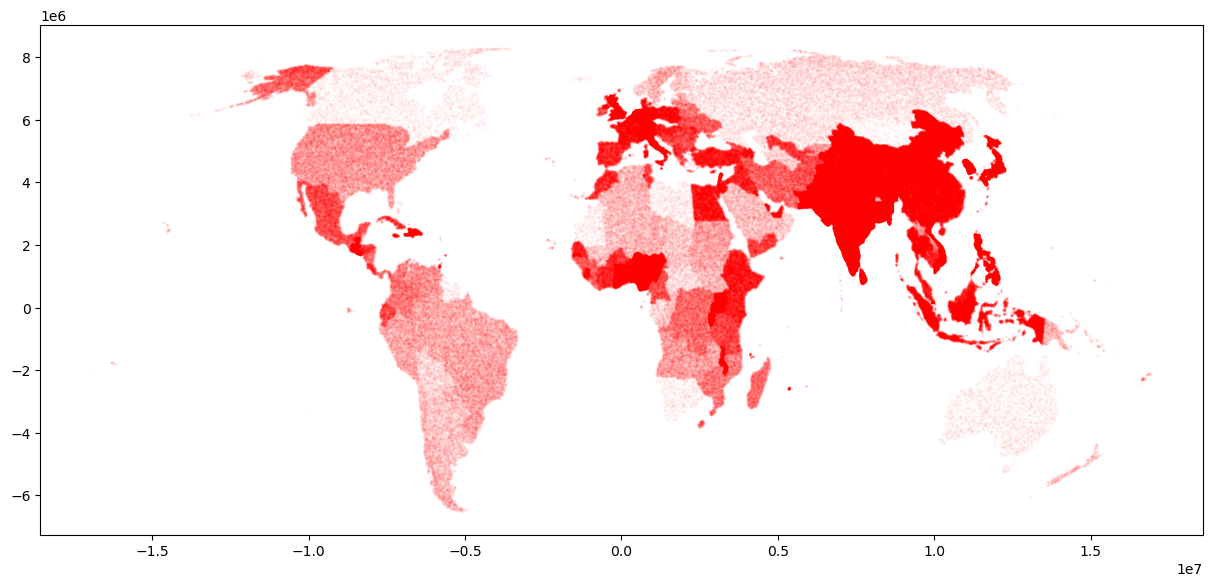

In [ ]:
dots_gdf.to_crs("EPSG:8857").plot(markersize=0.05, color='red',alpha=0.1,figsize=(15, 10))

# Choropleths

## Transformation of data values

### Re Scaling

We should plan how to color the polygons based on some variable, let me check our variables of interest:

In [ ]:
DataNames=['fragility', 'co2', 'ForestRev_gdp']

In [ ]:

pd.melt(theMapAndData[DataNames])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(pd.melt(theMapAndData[DataNames]),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

The variables are in different units, we should try a data rescaling strategy:

In [ ]:
# !pip install -U scikit-learn

* **StandardScaler**:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(theMapAndData[DataNames])
sns.displot(pd.melt(pd.DataFrame(normalized_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **MinMaxScaler**:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(scaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **RobustScaler**:

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
robScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(robScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

* **QuantileTransformer**:

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=99, random_state=0,output_distribution='normal') #or 'uniform'
QtScaled_data = scaler.fit_transform(theMapAndData[DataNames])

sns.displot(pd.melt(pd.DataFrame(QtScaled_data,columns=DataNames)),
            x="value", hue="variable",kind="kde",
            log_scale=(False,False))

Let's keep the last one:

In [ ]:
theMapAndData['fragility_Qt']=QtScaled_data[:,0]

### Discretizing

I will keep the _data_Qt_ data frame. Now, I want cut the data.
Please install [**numba**](https://numba.readthedocs.io/en/stable/user/installing.html) before runing the next code; also make sure you have **pysal**, **mapclassify** and **numpy** installed:

In [ ]:
! pip show numba mapclassify numpy

In [ ]:
# !pip install mapclassify

Let me discretize **fragility_Qt**:

In [ ]:
import mapclassify
import numpy as np

np.random.seed(12345) # so we all get the same results!

# let's try 5 intervals
K=5
theVar=theMapAndData.fragility_Qt
# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

How can we select the right classification?
Let me use the the Absolute deviation around class median (ADCM) to make the comparisson:

In [ ]:
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

Now, plot the **adcms**:

In [ ]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

Let's save the best strategy:

In [ ]:
theMapAndData['fragility_Qt_jc5'] = jc5.yb

In [ ]:
# there you are
theMapAndData[['fragility_Qt','fragility_Qt_jc5']].head()

Let's check the mean of 'fragility_Qt' by the labels of the columns created (from '0' to '4')

In [ ]:
indexList=['fragility_Qt_jc5'] # add more?
aggregator={'fragility_Qt': ['mean']}

pd.concat([theMapAndData[['fragility_Qt',col]].groupby(col,as_index=False).agg(aggregator) for col in indexList],axis=1)

We could create a new column:

In [ ]:
# renaming
newLabelsForLevels={0:"0_Great", 1:"1_Good", 2:"2_Middle", 3:"3_Bad", 4:"4_Poor"}

theMapAndData['fragility_Qt_jc5_cat']=theMapAndData.loc[:,'fragility_Qt_jc5'].replace(newLabelsForLevels)

# we have
theMapAndData[['fragility_Qt','fragility_Qt_jc5','fragility_Qt_jc5_cat']].head(20)

We are ready for a choropleth:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt_jc5_cat', # variable to plot
                   cmap='viridis', # set of colors
                   categorical=True, # can be interpreted as category
                   edgecolor='white', # border color
                   linewidth=0., # width of border
                   alpha=1, # level of transparency (0 is invisible)
                   legend=True, # need a legend?
                   # location of legend: 'best', 'upper right', 'upper left', 'lower left',
                   # 'lower right', 'right', 'center left', 'center right',
                   # 'lower center', 'upper center', 'center'
                   legend_kwds={'loc':"lower left"},
        ax=ax
       )

ax.set_axis_off()

However, once you know the ADCM, you can request the choropleth without creating a variable:

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
theMapAndData.plot(column='fragility_Qt',
                   cmap='OrRd',
                   scheme="jenkscaspall",k=5,
        edgecolor='grey',
        linewidth=0.5,
        alpha=1,
        legend=True,
        legend_kwds={'loc':3},
        ax=ax
       )

ax.set_axis_off()

In [ ]:
# finally

theMapAndData.to_file(os.path.join("maps","worldMaps.gpkg"), layer='indicators', driver="GPKG")